In [4]:
!pip install ktrain

In [5]:
pip install bnltk

  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [18 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://g

In [6]:
!pip install bnlp-toolkit==4.0.0.dev4

  Obtaining dependency information for bnlp-toolkit==4.0.0.dev4 from https://files.pythonhosted.org/packages/c7/8b/259efbf7f3fc1afb188a83a3378e35d1d39ef6750275ca24c3040c6060d1/bnlp_toolkit-4.0.0.dev4-py3-none-any.whl.metadata
  Obtaining dependency information for ftfy from https://files.pythonhosted.org/packages/91/f8/dfa32d06cfcbdb76bc46e0f5d69c537de33f4cedb1a15cd4746ab45a6a26/ftfy-6.1.3-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 4.6 MB/s eta 0:00:0000:01
  Preparing metadata (setup.py) ... done
  Obtaining dependency information for wcwidth<0.3.0,>=0.2.12 from https://files.pythonhosted.org/packages/31/b1/a59de0ad3aabb17523a39804f4c6df3ae87ead053a4e25362ae03d73d03a/wcwidth-0.2.12-py2.py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.5/993.5 kB 24.4 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 5.9 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=1

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
     

In [8]:
df = pd.read_excel("/kaggle/input/bangla-ekman-six-emotion-dataset/Dataset.xlsx")

In [9]:
df = df.drop('Racial Biases', axis=1)       
#axis=1 for coloum;
df = df.drop('Hatred Percentage', axis=1)
df = df.drop('Depression Percentage', axis=1)
df = df.drop('Year', axis=1)

In [10]:
df

,SL,Emotion,Text
0,1,disgust,নির্বাচনের আগের রাতে সুষ্টু শান্তিপূর্ণ ভাবে ভ...
1,2,disgust,জনগণ মনের আনন্দে নিজেদের ভোট কাস্ট করে দেশদ্রো...
2,3,angry,ভেজাল নির্বাচন ।
3,4,happy,বিএনপি ও রাজাকার সমর্থকরা হেরে গেলে দেশের জন্য...
4,5,angry,"সূক্ষ্ম কারচুপি বলে এতদিন একটা কথার কথা ছিল, এ..."
...,...,...,...
35995,35996,surprise,ভারতের মতো একটা বিশাল দেশে এত অঙ্গরাজ্য যে সব ...
35996,35997,surprise,"২৪, ৫০, এমনকি কারো কারো মতে ৬০ জন।"
35997,35998,surprise,এদের মধ্য থেকে ২৭ জনকে রাজা বিয়ে দিয়েছিল চন্দ্...
35998,35999,surprise,"ওয়াকফের শাব্দিক অর্থ কোনো কিছু আটকে রাখা, উৎসর..."


In [11]:
from bnlp import CleanText

clean_text = CleanText(
   fix_unicode=True,
   unicode_norm=True,
   unicode_norm_form="NFKC",
   remove_url=False,
   remove_email=False,
   remove_emoji=False,
   remove_number=False,
   remove_digits=False,
   remove_punct=False,
   replace_with_url="",
   replace_with_email="",
   replace_with_number="",
   replace_with_digit="",
   replace_with_punct = ""
)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [12]:
for i in range(0,df.shape[0]):
    
    text =  clean_text(df['Text'][i])
    df['Text'][i] = text

In [13]:
rows_to_display = [0, 1, 2]  # Choose the row indices you want to display

for row_index in rows_to_display:
    print(f"Row {row_index} - Original Text: {df.loc[row_index, 'Text']}")
    #print(f"Row {row_index} - Cleaned Text : {df.loc[row_index, 'cleaned_text']}\n")

Row 0 - Original Text: নির্বাচনের আগের রাতে সুষ্টু শান্তিপূর্ণ ভাবে ভোট বাক্স ভর্তি হলে যা হয়
Row 1 - Original Text: জনগণ মনের আনন্দে নিজেদের ভোট কাস্ট করে দেশদ্রোহী পেট্রল বোমারুদের নির্বাচনী ফলাফল থেকে উচ্ছেদ করেছে, ইহাই জনগনের মূল আনন্দ, জয় বাংলা!
Row 2 - Original Text: ভেজাল নির্বাচন ।


In [14]:
import re


# Define a function to check for special characters
def has_special_characters(Text):
    # Define a pattern to match special characters
    pattern = r'[\&\#\$\~\%\^\*\[\]\{\}]'
    # Use re.search() to check if the pattern is found in the text
    if re.search(pattern, Text):
        return True
    else:
        return False

# Apply the function to the 'Text' column to create a boolean mask
df['has_special_chars'] = df['Text'].apply(has_special_characters)

# Print rows where special characters are present
rows_with_special_chars = df[df['has_special_chars']]
print("Rows with Special Characters:")
print(rows_with_special_chars)


Rows with Special Characters:
          SL   Emotion                                               Text  \
23        24     happy  ভাল নির্বাচনে 100 % ভোটারদের উপস্থিতি থাকলে আর...   
99       100     happy         ১০০% খাটি কথা, হাজার কথার এক কথা। ধন্যবাদ।   
406      407  surprise  আওয়ামীলীগ সরকারের কর্মকাণ্ডে জনগণ ১০০% সন্তুষ...   
499      500     happy  নাইট শিফটে ভোটের বাক্স ভরেও মাত্র ৯০%? অবিলম্ব...   
509      510   disgust  আমার ভোটও আমি দিতে পারি নাই !! সুষ্টভাবে কোন র...   
...      ...       ...                                                ...   
35102  35103   disgust  এটাকে ৮০% জনতার ভোট আওয়ামীলীগের পক্ষে মনে না ...   
35543  35544      fear  আসলে হানিফ দাদার ভাষায় ইসি যে আওয়ামী লিগের প...   
35641  35642     happy  মুক্তি কে জিগাছ করা হোক কে বাঙ্গছে,,,,,,,তার ম...   
35767  35768  surprise  ৬৪% নারী কর্মী দালালদের টাকা দিয়ে মধ্যপ্রাচ্য...   
35924  35925  surprise  ৬৪% নারী কর্মী দালালদের টাকা দিয়ে মধ্যপ্রাচ্য...   

       has_special_chars  
23                

In [15]:
pip install nlu


  Obtaining dependency information for nlu from https://files.pythonhosted.org/packages/3d/32/7d92bb42e5089abb90d23e01476bcb91f7db0ed352ef9378a96760acbcad/nlu-5.1.0-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.9/108.9 kB 2.7 MB/s eta 0:00:00a 0:00:01
  Obtaining dependency information for spark-nlp>=5.0.2 from https://files.pythonhosted.org/packages/7e/11/8d8adda6e025d201d3988efe94caf18d8b427f04f378060662f5312b1b40/spark_nlp-5.1.4-py2.py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.8/54.8 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 656.0/656.0 kB 17.9 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.7/540.7 kB 44.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [16]:
pip install pyspark==3.0.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.8/204.8 MB 4.8 MB/s eta 0:00:0000:0100:02
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 20.0 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.0.2-py2.py3-none-any.whl size=205186667 sha256=a20f4d23be0107d1520cffdba665f71c5176fa9b4ab09be8a98e848750ae6a66
  Stored in directory: /root/.cache/pip/wheels/fb/cd/19/98b6d82b551dbb40136e297f1a86112dba87dfe0d93c9085ab
Successfully built pyspark
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9.7
    Uninstalling py4j-0.10.9.7:
      Successfully uninstalled py4j-0.10.9.7
Note: you may need to restart the kernel to use updated packages.


In [17]:
import nlu

In [18]:
df

,SL,Emotion,Text,has_special_chars
0,1,disgust,নির্বাচনের আগের রাতে সুষ্টু শান্তিপূর্ণ ভাবে ভ...,False
1,2,disgust,জনগণ মনের আনন্দে নিজেদের ভোট কাস্ট করে দেশদ্রো...,False
2,3,angry,ভেজাল নির্বাচন ।,False
3,4,happy,বিএনপি ও রাজাকার সমর্থকরা হেরে গেলে দেশের জন্য...,False
4,5,angry,"সূক্ষ্ম কারচুপি বলে এতদিন একটা কথার কথা ছিল, এ...",False
...,...,...,...,...
35995,35996,surprise,ভারতের মতো একটা বিশাল দেশে এত অঙ্গরাজ্য যে সব ...,False
35996,35997,surprise,"২৪, ৫০, এমনকি কারো কারো মতে ৬০ জন।",False
35997,35998,surprise,এদের মধ্য থেকে ২৭ জনকে রাজা বিয়ে দিয়েছিল চন্...,False
35998,35999,surprise,"ওয়াকফের শাব্দিক অর্থ কোনো কিছু আটকে রাখা, উৎস...",False


In [19]:
df = df.drop('has_special_chars', axis=1)
df

,SL,Emotion,Text
0,1,disgust,নির্বাচনের আগের রাতে সুষ্টু শান্তিপূর্ণ ভাবে ভ...
1,2,disgust,জনগণ মনের আনন্দে নিজেদের ভোট কাস্ট করে দেশদ্রো...
2,3,angry,ভেজাল নির্বাচন ।
3,4,happy,বিএনপি ও রাজাকার সমর্থকরা হেরে গেলে দেশের জন্য...
4,5,angry,"সূক্ষ্ম কারচুপি বলে এতদিন একটা কথার কথা ছিল, এ..."
...,...,...,...
35995,35996,surprise,ভারতের মতো একটা বিশাল দেশে এত অঙ্গরাজ্য যে সব ...
35996,35997,surprise,"২৪, ৫০, এমনকি কারো কারো মতে ৬০ জন।"
35997,35998,surprise,এদের মধ্য থেকে ২৭ জনকে রাজা বিয়ে দিয়েছিল চন্...
35998,35999,surprise,"ওয়াকফের শাব্দিক অর্থ কোনো কিছু আটকে রাখা, উৎস..."


In [20]:
from bnlp import NLTKTokenizer

bnltk = NLTKTokenizer()

def tokenize_text(Text):
    word_tokens = bnltk.word_tokenize(Text)
    sentence_tokens = bnltk.sentence_tokenize(Text)
    return word_tokens, sentence_tokens

# Apply tokenization to the 'Text' column
df[['word_tokens', 'sentence_tokens']] = df['Text'].apply(tokenize_text).apply(pd.Series)

# Print the tokenized data for a few specific rows
rows_to_display = [0, 1, 2,3,4]  # Choose the row indices you want to display

for row_index in rows_to_display:
   # print(f"Row {row_index} - Original Text: {df.loc[row_index, 'Text']}")
    print(f"Row {row_index} - Word Tokens: {df.loc[row_index, 'word_tokens']}")
    print(f"Row {row_index} - Sentence Tokens: {df.loc[row_index, 'sentence_tokens']}\n")
     

Row 0 - Word Tokens: ['নির্বাচনের', 'আগের', 'রাতে', 'সুষ্টু', 'শান্তিপূর্ণ', 'ভাবে', 'ভোট', 'বাক্স', 'ভর্তি', 'হলে', 'যা', 'হয়']
Row 0 - Sentence Tokens: ['নির্বাচনের আগের রাতে সুষ্টু শান্তিপূর্ণ ভাবে ভোট বাক্স ভর্তি হলে যা হয়']

Row 1 - Word Tokens: ['জনগণ', 'মনের', 'আনন্দে', 'নিজেদের', 'ভোট', 'কাস্ট', 'করে', 'দেশদ্রোহী', 'পেট্রল', 'বোমারুদের', 'নির্বাচনী', 'ফলাফল', 'থেকে', 'উচ্ছেদ', 'করেছে', ',', 'ইহাই', 'জনগনের', 'মূল', 'আনন্দ', ',', 'জয়', 'বাংলা', '!']
Row 1 - Sentence Tokens: ['জনগণ মনের আনন্দে নিজেদের ভোট কাস্ট করে দেশদ্রোহী পেট্রল বোমারুদের নির্বাচনী ফলাফল থেকে উচ্ছেদ করেছে, ইহাই জনগনের মূল আনন্দ, জয় বাংলা!']

Row 2 - Word Tokens: ['ভেজাল', 'নির্বাচন', '।']
Row 2 - Sentence Tokens: ['ভেজাল নির্বাচন ।']

Row 3 - Word Tokens: ['বিএনপি', 'ও', 'রাজাকার', 'সমর্থকরা', 'হেরে', 'গেলে', 'দেশের', 'জন্য', 'ভাল', ',', 'তাতে', 'আমিও', 'সন্তুষ্টি', 'খুঁজে', 'পাই', '।']
Row 3 - Sentence Tokens: ['বিএনপি ও রাজাকার সমর্থকরা হেরে গেলে দেশের জন্য ভাল, তাতে আমিও সন্তুষ্টি খুঁজে পাই।']

Row 4 - 

In [21]:
df = df.drop('sentence_tokens', axis=1)
df

,SL,Emotion,Text,word_tokens
0,1,disgust,নির্বাচনের আগের রাতে সুষ্টু শান্তিপূর্ণ ভাবে ভ...,"[নির্বাচনের, আগের, রাতে, সুষ্টু, শান্তিপূর্ণ, ..."
1,2,disgust,জনগণ মনের আনন্দে নিজেদের ভোট কাস্ট করে দেশদ্রো...,"[জনগণ, মনের, আনন্দে, নিজেদের, ভোট, কাস্ট, করে,..."
2,3,angry,ভেজাল নির্বাচন ।,"[ভেজাল, নির্বাচন, ।]"
3,4,happy,বিএনপি ও রাজাকার সমর্থকরা হেরে গেলে দেশের জন্য...,"[বিএনপি, ও, রাজাকার, সমর্থকরা, হেরে, গেলে, দেশ..."
4,5,angry,"সূক্ষ্ম কারচুপি বলে এতদিন একটা কথার কথা ছিল, এ...","[সূক্ষ্ম, কারচুপি, বলে, এতদিন, একটা, কথার, কথা..."
...,...,...,...,...
35995,35996,surprise,ভারতের মতো একটা বিশাল দেশে এত অঙ্গরাজ্য যে সব ...,"[ভারতের, মতো, একটা, বিশাল, দেশে, এত, অঙ্গরাজ্য..."
35996,35997,surprise,"২৪, ৫০, এমনকি কারো কারো মতে ৬০ জন।","[২৪, ,, ৫০, ,, এমনকি, কারো, কারো, মতে, ৬০, জন, ।]"
35997,35998,surprise,এদের মধ্য থেকে ২৭ জনকে রাজা বিয়ে দিয়েছিল চন্...,"[এদের, মধ্য, থেকে, ২৭, জনকে, রাজা, বিয়ে, দিয়..."
35998,35999,surprise,"ওয়াকফের শাব্দিক অর্থ কোনো কিছু আটকে রাখা, উৎস...","[ওয়াকফের, শাব্দিক, অর্থ, কোনো, কিছু, আটকে, রা..."


In [22]:
!pip install BnLemma

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 2.2 MB/s eta 0:00:00


In [23]:
pip install git+https://github.com/banglakit/lemmatizer.git

  Cloning https://github.com/banglakit/lemmatizer.git to /tmp/pip-req-build-_6gp0wr9
  Running command git clone --filter=blob:none --quiet https://github.com/banglakit/lemmatizer.git /tmp/pip-req-build-_6gp0wr9
  Resolved https://github.com/banglakit/lemmatizer.git to commit f94d8f8dfe06fac70fa151a46069888acffe8870
  Preparing metadata (setup.py) ... done
  Created wheel for banglakit-lemmatizer: filename=banglakit_lemmatizer-0.0.1-py3-none-any.whl size=117700 sha256=f984f5d2b6f02f855faa803194abac08e42214de3743fbab2978631f97e117d0
  Stored in directory: /tmp/pip-ephem-wheel-cache-mpgtv625/wheels/a8/7c/4d/469b65c3a833f0620db622cb84ef76e2b0519d5efb677b93e7
Successfully built banglakit-lemmatizer
Note: you may need to restart the kernel to use updated packages.


In [24]:
from banglakit.lemmatizer import BengaliLemmatizer

lemmatizer = BengaliLemmatizer()

def lemmatize_tokens(tokens):
    lem_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lem_tokens

df['lem_tokens'] = df['word_tokens'].apply(lambda x: lemmatize_tokens(x))

In [25]:
df

,SL,Emotion,Text,word_tokens,lem_tokens
0,1,disgust,নির্বাচনের আগের রাতে সুষ্টু শান্তিপূর্ণ ভাবে ভ...,"[নির্বাচনের, আগের, রাতে, সুষ্টু, শান্তিপূর্ণ, ...","[নির্বাচনের, আগের, রাতে, সুষ্টু, শান্তিপূর্ণ, ..."
1,2,disgust,জনগণ মনের আনন্দে নিজেদের ভোট কাস্ট করে দেশদ্রো...,"[জনগণ, মনের, আনন্দে, নিজেদের, ভোট, কাস্ট, করে,...","[জনগণ, মনের, আনন্দে, নিজেদের, ভোট, কাস্ট, কর, ..."
2,3,angry,ভেজাল নির্বাচন ।,"[ভেজাল, নির্বাচন, ।]","[ভেজাল, নির্বাচন, ।]"
3,4,happy,বিএনপি ও রাজাকার সমর্থকরা হেরে গেলে দেশের জন্য...,"[বিএনপি, ও, রাজাকার, সমর্থকরা, হেরে, গেলে, দেশ...","[বিএনপি, ও, রাজাকার, সমর্থকরা, হেরে, যাওয়া, দে..."
4,5,angry,"সূক্ষ্ম কারচুপি বলে এতদিন একটা কথার কথা ছিল, এ...","[সূক্ষ্ম, কারচুপি, বলে, এতদিন, একটা, কথার, কথা...","[সূক্ষ্ম, কারচুপি, বল, এতদিন, একটা, কথার, কথা,..."
...,...,...,...,...,...
35995,35996,surprise,ভারতের মতো একটা বিশাল দেশে এত অঙ্গরাজ্য যে সব ...,"[ভারতের, মতো, একটা, বিশাল, দেশে, এত, অঙ্গরাজ্য...","[ভারতের, মতো, একটা, বিশাল, দেশে, এত, অঙ্গরাজ্য..."
35996,35997,surprise,"২৪, ৫০, এমনকি কারো কারো মতে ৬০ জন।","[২৪, ,, ৫০, ,, এমনকি, কারো, কারো, মতে, ৬০, জন, ।]","[২৪, ,, ৫০, ,, এমনকি, কারো, কারো, মতে, ৬০, জন, ।]"
35997,35998,surprise,এদের মধ্য থেকে ২৭ জনকে রাজা বিয়ে দিয়েছিল চন্...,"[এদের, মধ্য, থেকে, ২৭, জনকে, রাজা, বিয়ে, দিয়...","[এদের, মধ্য, থেকে, ২৭, জনকে, রাজা, বিয়ে, দিয়..."
35998,35999,surprise,"ওয়াকফের শাব্দিক অর্থ কোনো কিছু আটকে রাখা, উৎস...","[ওয়াকফের, শাব্দিক, অর্থ, কোনো, কিছু, আটকে, রা...","[ওয়াকফের, শাব্দিক, অর্থ, কোনো, কিছু, আটকে, রা..."


In [26]:
def lemmatize_tokens_join(tokens):
    lem_text = ' '.join(tokens)
    return lem_text

df['Lemm_Text'] = df['lem_tokens'].apply(lambda x: lemmatize_tokens_join(x))

In [27]:
df

,SL,Emotion,Text,word_tokens,lem_tokens,Lemm_Text
0,1,disgust,নির্বাচনের আগের রাতে সুষ্টু শান্তিপূর্ণ ভাবে ভ...,"[নির্বাচনের, আগের, রাতে, সুষ্টু, শান্তিপূর্ণ, ...","[নির্বাচনের, আগের, রাতে, সুষ্টু, শান্তিপূর্ণ, ...",নির্বাচনের আগের রাতে সুষ্টু শান্তিপূর্ণ ভাবে ভ...
1,2,disgust,জনগণ মনের আনন্দে নিজেদের ভোট কাস্ট করে দেশদ্রো...,"[জনগণ, মনের, আনন্দে, নিজেদের, ভোট, কাস্ট, করে,...","[জনগণ, মনের, আনন্দে, নিজেদের, ভোট, কাস্ট, কর, ...",জনগণ মনের আনন্দে নিজেদের ভোট কাস্ট কর দেশদ্রোহ...
2,3,angry,ভেজাল নির্বাচন ।,"[ভেজাল, নির্বাচন, ।]","[ভেজাল, নির্বাচন, ।]",ভেজাল নির্বাচন ।
3,4,happy,বিএনপি ও রাজাকার সমর্থকরা হেরে গেলে দেশের জন্য...,"[বিএনপি, ও, রাজাকার, সমর্থকরা, হেরে, গেলে, দেশ...","[বিএনপি, ও, রাজাকার, সমর্থকরা, হেরে, যাওয়া, দে...",বিএনপি ও রাজাকার সমর্থকরা হেরে যাওয়া দেশের জন্...
4,5,angry,"সূক্ষ্ম কারচুপি বলে এতদিন একটা কথার কথা ছিল, এ...","[সূক্ষ্ম, কারচুপি, বলে, এতদিন, একটা, কথার, কথা...","[সূক্ষ্ম, কারচুপি, বল, এতদিন, একটা, কথার, কথা,...","সূক্ষ্ম কারচুপি বল এতদিন একটা কথার কথা ছিল , এ..."
...,...,...,...,...,...,...
35995,35996,surprise,ভারতের মতো একটা বিশাল দেশে এত অঙ্গরাজ্য যে সব ...,"[ভারতের, মতো, একটা, বিশাল, দেশে, এত, অঙ্গরাজ্য...","[ভারতের, মতো, একটা, বিশাল, দেশে, এত, অঙ্গরাজ্য...",ভারতের মতো একটা বিশাল দেশে এত অঙ্গরাজ্য -PRON-...
35996,35997,surprise,"২৪, ৫০, এমনকি কারো কারো মতে ৬০ জন।","[২৪, ,, ৫০, ,, এমনকি, কারো, কারো, মতে, ৬০, জন, ।]","[২৪, ,, ৫০, ,, এমনকি, কারো, কারো, মতে, ৬০, জন, ।]","২৪ , ৫০ , এমনকি কারো কারো মতে ৬০ জন ।"
35997,35998,surprise,এদের মধ্য থেকে ২৭ জনকে রাজা বিয়ে দিয়েছিল চন্...,"[এদের, মধ্য, থেকে, ২৭, জনকে, রাজা, বিয়ে, দিয়...","[এদের, মধ্য, থেকে, ২৭, জনকে, রাজা, বিয়ে, দিয়...",এদের মধ্য থেকে ২৭ জনকে রাজা বিয়ে দিয়েছিল চন্...
35998,35999,surprise,"ওয়াকফের শাব্দিক অর্থ কোনো কিছু আটকে রাখা, উৎস...","[ওয়াকফের, শাব্দিক, অর্থ, কোনো, কিছু, আটকে, রা...","[ওয়াকফের, শাব্দিক, অর্থ, কোনো, কিছু, আটকে, রা...","ওয়াকফের শাব্দিক অর্থ কোনো কিছু আটকে রাখ , উৎস..."


In [28]:
text = df['Lemm_Text'].values.tolist()
label = df['Emotion'].tolist()

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text , label, test_size=0.2, random_state=42)


In [30]:
import ktrain
from ktrain import text
MODEL_NAME = 'sagorsarker/bangla-bert-base'
t = text.Transformer(MODEL_NAME, maxlen=500)

In [31]:
trn = t.preprocess_train(X_train, y_train)
val = t.preprocess_test(X_test, y_test)

preprocessing train...
language: bn
train sequence lengths:
	mean : 18
	95percentile : 49
	99percentile : 75


Is Multi-Label? False
preprocessing test...
language: bn
test sequence lengths:
	mean : 18
	95percentile : 48
	99percentile : 75


In [32]:
model = t.get_classifier()

In [33]:
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=12)

In [34]:
history = learner.fit_onecycle(2e-5, 5)



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/5
2400/2400 [==============================] - 2174s 894ms/step - loss: 1.4520 - accuracy: 0.4281 - val_loss: 1.0595 - val_accuracy: 0.6154
Epoch 2/5
2400/2400 [==============================] - 2144s 893ms/step - loss: 0.7515 - accuracy: 0.7477 - val_loss: 0.6075 - val_accuracy: 0.8132
Epoch 3/5
2400/2400 [==============================] - 2143s 893ms/step - loss: 0.4421 - accuracy: 0.8557 - val_loss: 0.4992 - val_accuracy: 0.8454
Epoch 4/5
2400/2400 [==============================] - 2144s 893ms/step - loss: 0.2355 - accuracy: 0.9229 - val_loss: 0.5037 - val_accuracy: 0.8607
Epoch 5/5
2400/2400 [==============================] - 2145s 894ms/step - loss: 0.1263 - accuracy: 0.9549 - val_loss: 0.5095 - val_accuracy: 0.8689


In [35]:
learner.validate(class_names=t.get_classes())

225/225 [==============================] - 155s 675ms/step
              precision    recall  f1-score   support

       angry       0.84      0.85      0.85      1226
     disgust       0.88      0.89      0.88      1188
        fear       0.89      0.92      0.90      1129
       happy       0.91      0.88      0.89      1246
         sad       0.80      0.76      0.78      1244
    surprise       0.90      0.92      0.91      1167

    accuracy                           0.87      7200
   macro avg       0.87      0.87      0.87      7200
weighted avg       0.87      0.87      0.87      7200



array([[1048,   47,   21,   19,   78,   13],
       [  51, 1058,   11,   17,   32,   19],
       [  24,   10, 1040,   13,   34,    8],
       [  31,    7,   16, 1096,   61,   35],
       [  81,   65,   68,   47,  941,   42],
       [  19,   18,   17,   13,   27, 1073]])

In [36]:
def PlotGraph(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'g', label='Training acc')
    plt.plot(x, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'g', label='Training loss')
    plt.plot(x, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
     

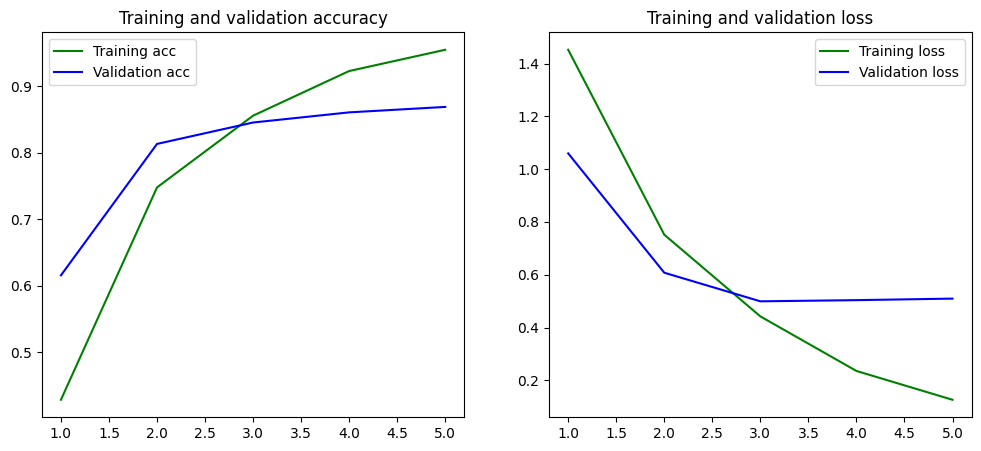

In [37]:
PlotGraph(history)